# Milestone 3

### Dataset 01: Deforestration of forest regions by states from 2001 to 2021
- Section 1: EDA
    - 1.1: Descriptive statistics, information about the data, distribution of data
    - 1.2: Total deforestration in forest regions by year
- Section 2: Baseline Model
    - Linear Regression
### Dataset 02: Deforestration of municipalities in each state from 2007 to 2022
- Section 1: EDA
    - 1.1: Descriptive statistics, information about the data, distribution of data
    - 1.2: Average area of deforestation by year, plot of the changes in average
    - 1.3: Difference in deforestation by year, plot of difference between area from previous year
- Section 2: Baseline Model
    - Time Series 
    - Linear Regression

# Dataset 01

## Section 1: EDA

### 1.1 Descriptive statistics, information about the data, distribution of data

In [1]:
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from numpy import std

In [4]:
#Read deforestration dataset
file_name_1 =  'terrabrasilis_deforestration.csv';
df = pd.read_csv(file_name_1, decimal=',')
#Convert data type of area to float
df['areakm'] = df['areakm'].str.replace(',','')
df['areakm'] = df.areakm.astype(pd.np.float64)

#Print shape of the dataset
print('Shape: {}'.format(df.shape))

#Print first 5 rows of the dataset
df.head(5)

Shape: (811, 4)


<ipython-input-4-300c741380d1>:6: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  df['areakm'] = df.areakm.astype(pd.np.float64)


,year,areakm,state,region
0,2004,661.35,Mato Grosso do Sul,pantanal
1,2003,661.35,Mato Grosso do Sul,pantanal
2,2002,661.35,Mato Grosso do Sul,pantanal
3,2001,661.35,Mato Grosso do Sul,pantanal
4,2006,634.51,Mato Grosso do Sul,pantanal


What are the names of the forest regions and how many are there?

In [5]:
df.region.unique()

array(['pantanal', 'cerrado', 'caatinga', 'mata_atlantica', 'pampa'],
      dtype=object)

In [6]:
df.region.nunique()

5

What are the names of the states which these forest regiions spans across and how many are there?

In [7]:
df.state.unique()

array(['Mato Grosso do Sul', 'Mato Grosso', 'Tocantins', 'Goiás',
       'Maranhão', 'Minas Gerais', 'Bahia', 'Piauí', 'Pará', 'São Paulo',
       'Distrito Federal', 'Rondônia', 'Paraná', 'Ceará', 'Pernambuco',
       'Paraíba', 'Rio Grande do Norte', 'Sergipe', 'Alagoas',
       'Rio Grande do Sul', 'Santa Catarina', 'Espírito Santo',
       'Rio de Janeiro'], dtype=object)

In [8]:
df.state.nunique()

23

<Axes: >

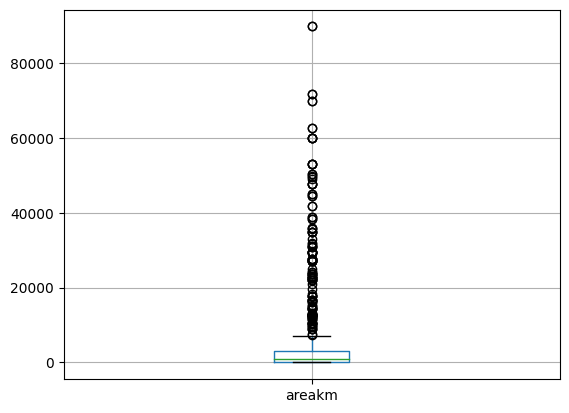

In [9]:
#Box plot on areakm field
df.boxplot(column='areakm')

We can see that there are considerable amount of outliers over the upper bound. 

<ipython-input-10-662b6eb55f4b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['areakm'])


<Axes: xlabel='areakm', ylabel='Density'>

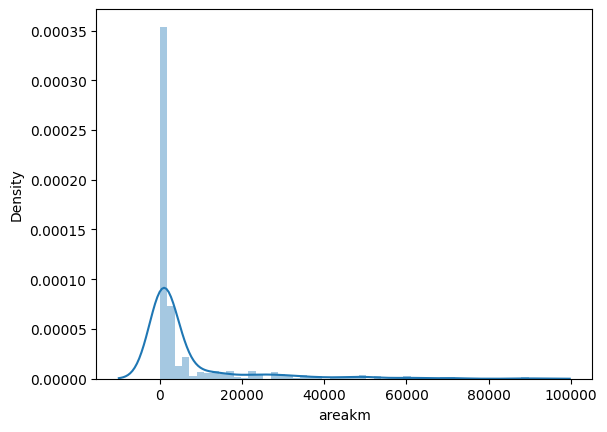

In [10]:
sns.distplot(df['areakm'])

In [11]:
df.corr()

,year,areakm
year,1.000000,-0.200563
areakm,-0.200563,1.000000


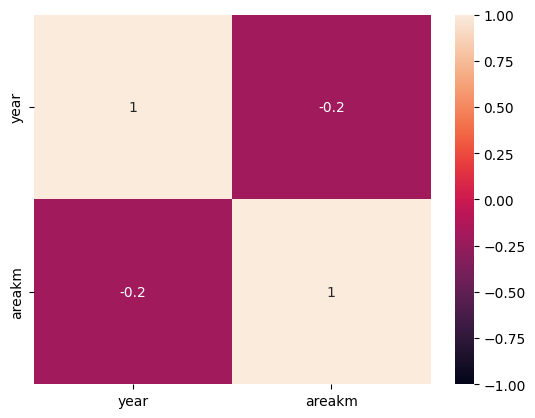

In [12]:
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True);

The distribution of the area is skewed to the right

## 1.2: Total deforestration in forest regions by year

In [13]:
#Total area lost annualy in each forest region
regions = df.region.unique()
years = df.year.unique()
area_by_region = pd.DataFrame(columns=['region', 'year', 'areakm'])
i=0
for reg in regions:
    for yr in years:
        res = round(df.loc[(df['region']==reg) & (df['year']==yr), 'areakm'].sum(), 3)
        area_by_region.loc[i,:] = [reg, yr,res]
        i = i+1
area_by_region['year'] = area_by_region.year.astype(pd.np.float64)
area_by_region['areakm'] = area_by_region.areakm.astype(pd.np.float64)

#Print shape of the dataset
print('Shape: {}'.format(area_by_region.shape))

Shape: (110, 3)


<ipython-input-13-99058ef43e48>:11: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  area_by_region['year'] = area_by_region.year.astype(pd.np.float64)
<ipython-input-13-99058ef43e48>:12: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  area_by_region['areakm'] = area_by_region.areakm.astype(pd.np.float64)


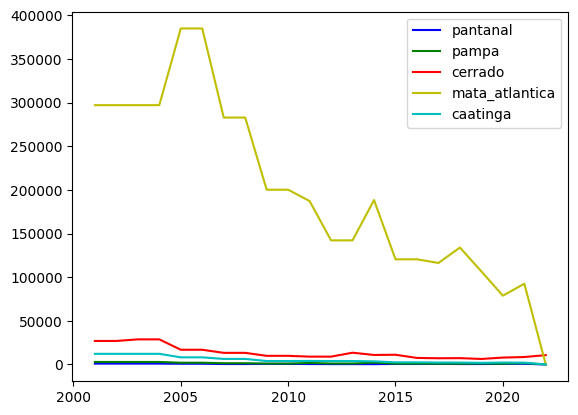

In [15]:
#Plot total area of deforestration over the years by forest region
import matplotlib.pyplot as plt
%matplotlib inline

line_1 = area_by_region.loc[area_by_region.region == 'pantanal'].sort_values(by='year')
line_2 = area_by_region.loc[area_by_region.region == 'pampa'].sort_values(by='year')
line_3 = area_by_region.loc[area_by_region.region == 'cerrado'].sort_values(by='year')
line_4 = area_by_region.loc[area_by_region.region == 'mata_atlantica'].sort_values(by='year')
line_5 = area_by_region.loc[area_by_region.region == 'caatinga'].sort_values(by='year')

fig,ax = plt.subplots()

ax.plot(line_1.year, line_1['areakm'], color='b')
ax.plot(line_2.year, line_2['areakm'], color='g')
ax.plot(line_3.year, line_3['areakm'], color='r')
ax.plot(line_4.year, line_4['areakm'], color='y')
ax.plot(line_5.year, line_5['areakm'], color='c')
ax.legend(labels=['pantanal','pampa','cerrado','mata_atlantica','caatinga'])
plt.show()

## Section 2: Baseline Model

### Linear Regression

In [16]:
#One-Hot encoding of categorical variables
new_df = pd.get_dummies(data=df, columns=['state', 'region'], drop_first=False)

In [17]:
array = new_df.drop(labels='areakm', axis=1)
x = array.values
y = new_df['areakm'].values
kf = KFold(n_splits=5, random_state=13, shuffle=True)
model = LinearRegression()

scores = cross_val_score(model, x, y, cv=kf, n_jobs=-1)

#The mean accuracy
print('Model ASE %3f' % scores.mean())

Model ASE 0.483809


The mean accuracy of the model is 0.48 which is really low. 

# Dataset 02

## Section 1: EDA

### 1.1 Descriptive statistics, information about the data, distribution of data

In [3]:
file_name_2 = 'brazil_deforestration_by_state_formatted.csv'
data=pd.read_csv(file_name_2)

In [4]:
#Print shape of the dataset
print('Shape: {}'.format(data.shape))

#Print first 10 rows of the dataset
data.head(5)

Shape: (6640, 5)


,year,areakm,municipality,geocode_ibge,state
0,2007,1005.901508,Acrelandia,1200013,Acre
1,2008,1029.568595,Acrelandia,1200013,Acre
2,2009,1042.506828,Acrelandia,1200013,Acre
3,2010,1053.838906,Acrelandia,1200013,Acre
4,2011,1069.777544,Acrelandia,1200013,Acre


In [5]:
#Remove geocode_ibge columns
data = data.drop(columns=['geocode_ibge'])

What are the names of all the municipalities and how many are there?

In [6]:
data['municipality'].unique()

array(['Acrelandia', 'Assis Brasil', 'Brasileia', 'Bujari', 'Capixaba',
       'Cruzeiro do Sul', 'Epitaciolandia', 'Feijo', 'Jordao',
       'Mancio Lima', 'Manoel Urbano', 'Marechal Thaumaturgo',
       'Placido de Castro', 'Porto Acre', 'Porto Walter', 'Rio Branco',
       'Rodrigues Alves', 'Santa Rosa do Purus', 'Sena Madureira',
       'Senador Guiomard', 'Tarauaca', 'Xapuri', 'Amapa', 'Calcoene',
       'Cutias', 'Ferreira Gomes', 'Itaubal', 'Laranjal do Jari',
       'Macapa', 'Mazagao', 'Oiapoque', 'Pedra Branca do Amapari',
       'Porto Grande', 'Pracuuba', 'Santana', 'Serra do Navio',
       'Tartarugalzinho', 'Vitoria do Jari', 'Alvaraes', 'Amatura',
       'Anama', 'Anori', 'Apui', 'Atalaia do Norte', 'Autazes',
       'Barcelos', 'Barreirinha', 'Benjamin Constant', 'Beruri',
       'Boa Vista do Ramos', 'Boca do Acre', 'Borba', 'Caapiranga',
       'Canutama', 'Carauari', 'Careiro', 'Careiro da Varzea', 'Coari',
       'Codajas', 'Eirunepe', 'Envira', 'Fonte Boa', 'Guaja

In [7]:
data['municipality'].nunique()

412

There are 412 unique municipalities which are listed above.

What are the names of all the states and how many are there?

In [8]:
data['state'].unique()

array(['Acre', 'Amapa', 'Amazonas', 'Maranhao', 'Mato Grosso', 'Rondonia',
       'Roraima', 'Tocantins'], dtype=object)

In [9]:
data['state'].nunique()

8

There are 8 different states which are listed above.

Sort the data by year (ascending)

In [10]:
data.sort_values(by=['year'])

,year,areakm,municipality,state
0,2007,1005.901508,Acrelandia,Acre
2704,2007,68.882225,Paco do Lumiar,Maranhao
4528,2007,150.828449,Reserva do Cabacal,Mato Grosso
4064,2007,237.488863,Lucas do Rio Verde,Mato Grosso
5200,2007,1486.386657,Costa Marques,Rondonia
...,...,...,...,...
4767,2022,342.400689,Serra Nova Dourada,Mato Grosso
1663,2022,1800.440157,Alto Alegre do Pindare,Maranhao
4783,2022,2643.463789,Sinop,Mato Grosso
6223,2022,307.013326,Carmolandia,Tocantins


<Axes: >

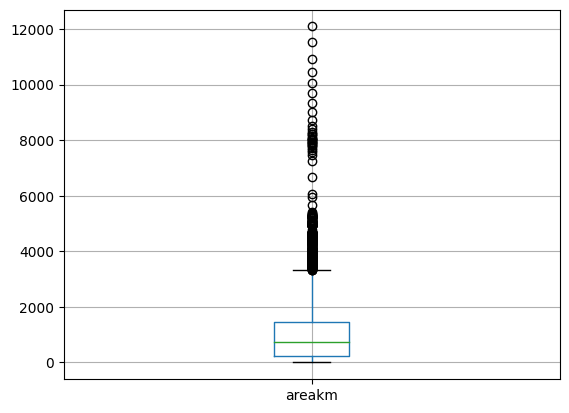

In [11]:
data.boxplot(column='areakm')

<ipython-input-12-5d8efa538ca8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['areakm'])


<Axes: xlabel='areakm', ylabel='Density'>

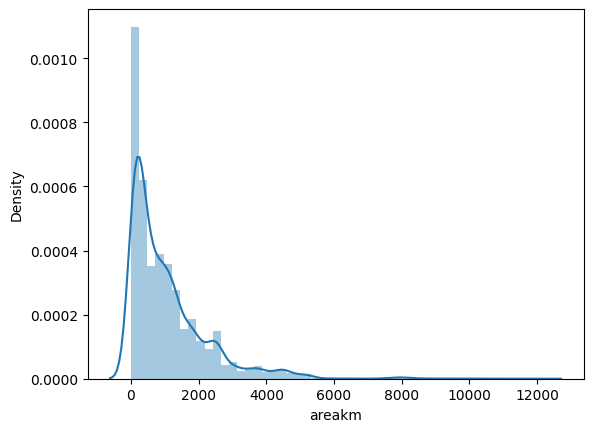

In [12]:
sns.distplot(data['areakm'])

In [13]:
data.corr()

,year,areakm
year,1.000000,0.037619
areakm,0.037619,1.000000


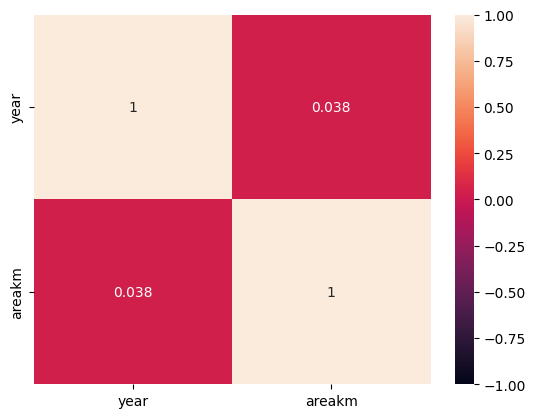

In [14]:
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True);

The data spans from 2007 to 2022.

Now lets look at the data for each state.

In [15]:
################
#To look at EDA for diffrent states, run this cell and input the state you wish to analyze
###############

state= input('State: ')
state_data=data[data['state']==state]
state_data.sort_values(by=['year'])

State: Acre


,year,areakm,municipality,state
0,2007,1005.901508,Acrelandia,Acre
32,2007,1203.149826,Brasileia,Acre
272,2007,67.116349,Santa Rosa do Purus,Acre
256,2007,409.719071,Rodrigues Alves,Acre
48,2007,1116.955936,Bujari,Acre
...,...,...,...,...
255,2022,3062.655247,Rio Branco,Acre
271,2022,527.223835,Rodrigues Alves,Acre
287,2022,114.865099,Santa Rosa do Purus,Acre
319,2022,1744.081345,Senador Guiomard,Acre


Text(0, 0.5, 'Frequency')

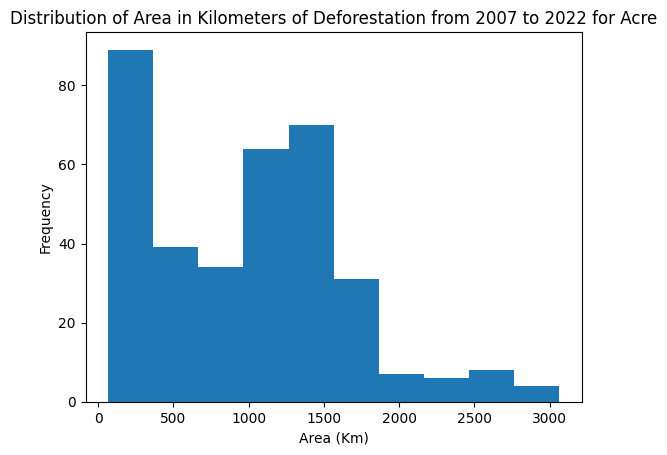

In [16]:
import matplotlib.pyplot as plt
plt.hist(state_data['areakm'])
plt.title('Distribution of Area in Kilometers of Deforestation from 2007 to 2022 for {}'.format(state))
plt.xlabel('Area (Km)')
plt.ylabel('Frequency')

In [17]:
state_data['areakm'].describe()

count     352.000000
mean      988.131688
std       656.949701
min        67.116349
25%       345.975311
50%      1056.185245
75%      1398.961778
max      3062.655247
Name: areakm, dtype: float64

### 1.2: Average Area of Deforestation (Km) by Year 

In [25]:
average_km = state_data.groupby('year')['areakm'].mean()

average_km = average_km.to_frame()

In [26]:
average_km=average_km.reset_index()
average_km

,year,areakm
0,2007,882.440254
1,2008,895.565653
2,2009,902.917072
3,2010,914.974482
4,2011,928.408634
5,2012,940.704718
6,2013,949.806710
7,2014,965.651654
8,2015,975.781423
9,2016,992.425323


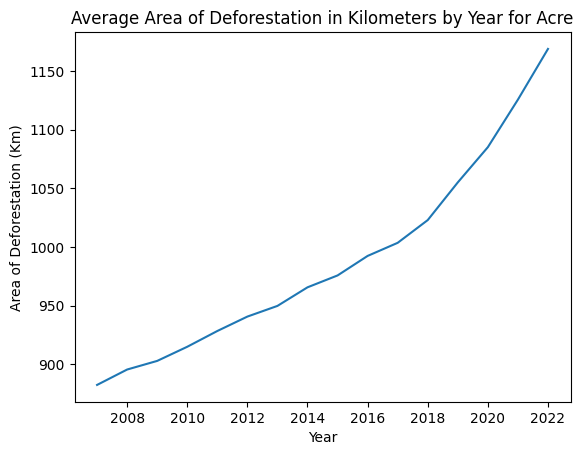

In [27]:
plt.plot(average_km.year,average_km.areakm)
plt.xlabel('Year')
plt.ylabel('Area of Deforestation (Km)')
plt.title('Average Area of Deforestation in Kilometers by Year for {}'.format(state))
plt.show()

Based on the plot, we can say that there is an upwards trend in average area of deforestation by year. The function is monotonically increasing.

### 1.3: Difference in Area of Deforestation by Year

Find the difference in area of deforestation in kilometers from the previous year.

$ Area_{n+1}- Area_{n} $

In [28]:
#calculates the diffrenece in area from previous year
area_vals = average_km['areakm'].values
diff_area = area_vals[1:] - area_vals[:-1]
diff_area = pd.DataFrame(diff_area, columns=['diff_area'])

In [29]:
diff_area['year'] = range(2008, 2023)

In [30]:
diff_area

,diff_area,year
0,13.125399,2008
1,7.351419,2009
2,12.057410,2010
3,13.434153,2011
4,12.296084,2012
5,9.101991,2013
6,15.844944,2014
7,10.129769,2015
8,16.643900,2016
9,11.166071,2017


Each entry in the above dataframe shows the diffrence in area of deforestation from the previous year.

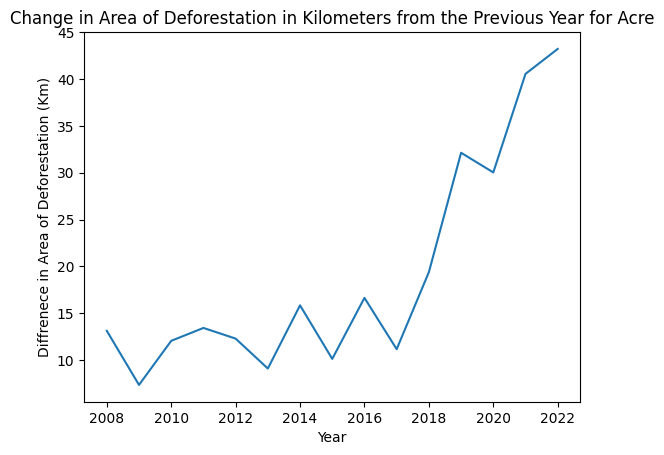

In [31]:
plt.plot(diff_area.year,diff_area.diff_area)
plt.xlabel('Year')
plt.ylabel('Diffrenece in Area of Deforestation (Km)')
plt.title('Change in Area of Deforestation in Kilometers from the Previous Year for {}'.format(state))
plt.show()

From this plot, we can see that the area of deforestation has skyrocketed in previous years. From 2018, the area of deforestation has steadily incresed and shows an upwards trend. 

## Section 2: Baseline Model

In [32]:
series = state_data.groupby('year')['areakm'].mean()
# Create a Series with a DatetimeIndex
data = pd.Series([1, 2, 3], index=pd.date_range('2022-01-01', periods=3, freq='D'))

In [33]:
series

year
2007     882.440254
2008     895.565653
2009     902.917072
2010     914.974482
2011     928.408634
2012     940.704718
2013     949.806710
2014     965.651654
2015     975.781423
2016     992.425323
2017    1003.591394
2018    1022.981667
2019    1055.112554
2020    1085.145100
2021    1125.693047
2022    1168.907323
Name: areakm, dtype: float64

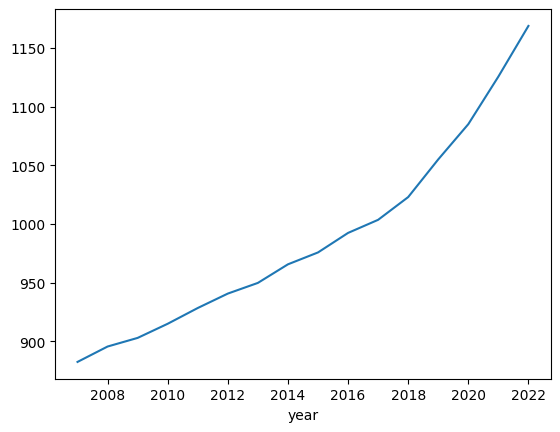

In [34]:
from matplotlib import pyplot 

series.plot()
pyplot.show()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

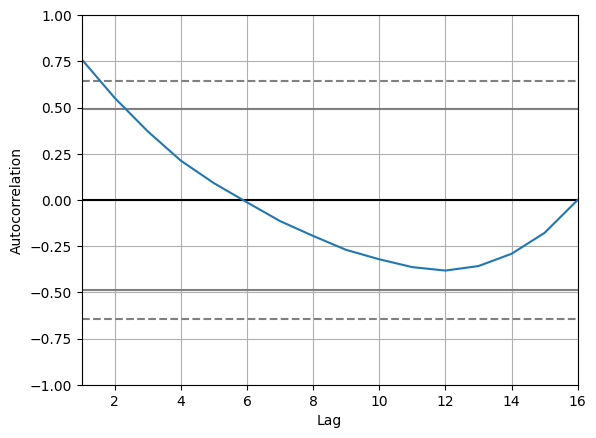

In [35]:
#autocorrelation plot
pd.plotting.autocorrelation_plot(series)

There is a high degree of autocorrelation between consecutive observations. The data is not random and has some relationship.

### Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression 
import numpy
X = [i for i in range(0, len(series))]
X = numpy.reshape(X, (len(X), 1))
y = series.values
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [37]:
# calculate trend
trend = model.predict(X)

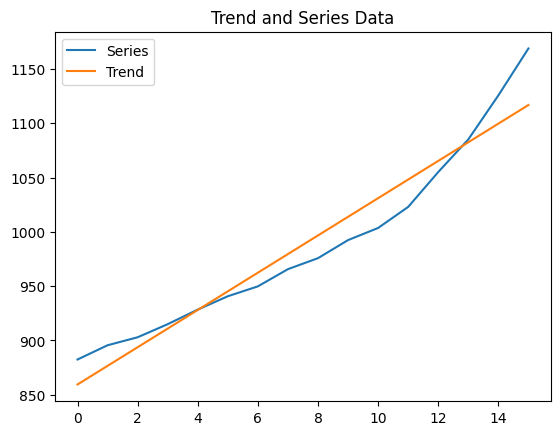

In [38]:
# calculate trend
trend = model.predict(X)
# plot trend
pyplot.plot(y, label='Series')
pyplot.plot(trend, label = 'Trend')
plt.legend(loc="upper left")
pyplot.title('Trend and Series Data')
pyplot.show()

In [39]:
# split into train and test sets
X = series.values
size = int(len(X) * 0.70)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]

In [40]:
from statsmodels.tsa.arima.model import ARIMA
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(1,1,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


predicted=1015.639272, expected=1022.981667
predicted=1036.812400, expected=1055.112554
predicted=1080.939662, expected=1085.145100
predicted=1114.024757, expected=1125.693047
predicted=1163.473834, expected=1168.907323


In [41]:
history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(test)):
 model = ARIMA(history, order=(5,1,1))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts

/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1018.392311, expected=1022.981667


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1034.037583, expected=1055.112554
predicted=1079.775473, expected=1085.145100


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1113.478409, expected=1125.693047
predicted=1164.355530, expected=1168.907323


In [42]:
from sklearn.metrics import mean_squared_error 
from math import sqrt
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 11.524


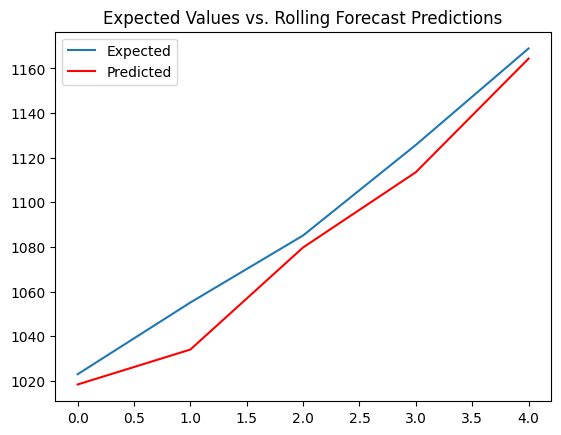

In [43]:
# plot forecasts against actual outcomes
pyplot.plot(test, label='Expected')
pyplot.plot(predictions, color='red', label='Predicted')
pyplot.title('Expected Values vs. Rolling Forecast Predictions')
plt.legend(loc="upper left")
pyplot.show()